In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

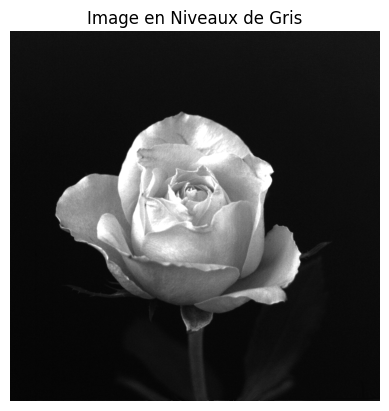

In [ ]:
image_gray = cv2.imread('/content/rose_1024.tif', cv2.IMREAD_GRAYSCALE)

if image_gray is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    plt.imshow(image_gray, cmap='gray')
    plt.title('Image en Niveaux de Gris')
    plt.axis('off')
    plt.show()

In [74]:
luminosity = np.mean(image_gray)
print(f"Luminosité de l'image : {luminosity:.2f}")

Luminosité de l'image : 46.79


In [75]:
contrast = np.std(image_gray)
print(f"Contraste de l'image : {contrast:.2f}")

Contraste de l'image : 66.10


In [76]:
histogram = np.zeros(256, dtype=int)

for pixel in image_gray.flatten():
    histogram[pixel] += 1

print("Histogramme calculé :", histogram)

Histogramme calculé : [   13     3    49   891  6190 19586 19504 48120 75408 38868 73604 30966
 54158 46958 96990 54822 49778 71683     0 25623 19486 30895     0  8982
  4556  7405     0     0  4062     0  2932     0  1319  1286  2357     0
  1300     0  1191     0  1913     0  1173     0  2570     0     0   827
     0   675  1364     0     0   572     0   691   779     0  1307     0
   745     0   725   732     0   726   768     0  1004     0  2197     0
     0   811     0  1443  1221     0  1383  1418  1366     0  3475     0
     0     0  1842     0  1896  1980     0  1714  2538     0  2201     0
     0  4524     0     0  2273     0  2458     0  2082     0  2575  1719
     0     0  2132     0  4069     0     0     0  1888  2448     0  2471
     0     0  2478  2455     0  2807     0     0  5419     0     0     0
  2655  2808     0     0  3179     0  6368     0     0  3488     0     0
  7629     0     0     0  3960  4040     0     0  4188     0  4192     0
  3996     0  4630     0  815

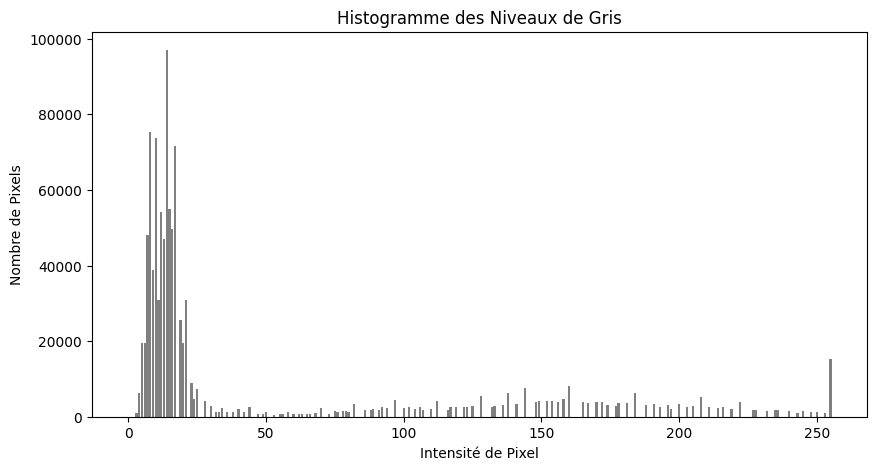

In [77]:
plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram, color='gray')
plt.title('Histogramme des Niveaux de Gris')
plt.xlabel('Intensité de Pixel')
plt.ylabel('Nombre de Pixels')
plt.show()

#**2SD PART**

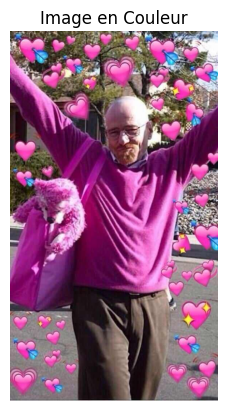

In [78]:
image_color = cv2.imread('/content/412437087_337796199022738_1552023191636572537_n.jpg')

if image_color is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    image_color_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

    plt.imshow(image_color_rgb)
    plt.title('Image en Couleur')
    plt.axis('off')
    plt.show()


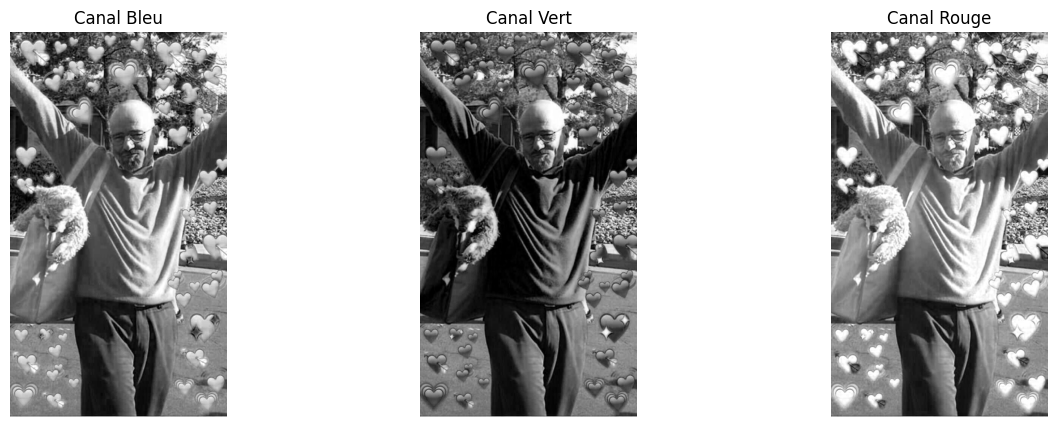

In [79]:
blue_channel, green_channel, red_channel = cv2.split(image_color)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title('Canal Bleu')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Canal Vert')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(red_channel, cmap='gray')
plt.title('Canal Rouge')
plt.axis('off')

plt.show()

In [80]:
hist_blue = np.zeros(256, dtype=int)
hist_green = np.zeros(256, dtype=int)
hist_red = np.zeros(256, dtype=int)

for pixel in blue_channel.flatten():
    hist_blue[pixel] += 1

for pixel in green_channel.flatten():
    hist_green[pixel] += 1

for pixel in red_channel.flatten():
    hist_red[pixel] += 1

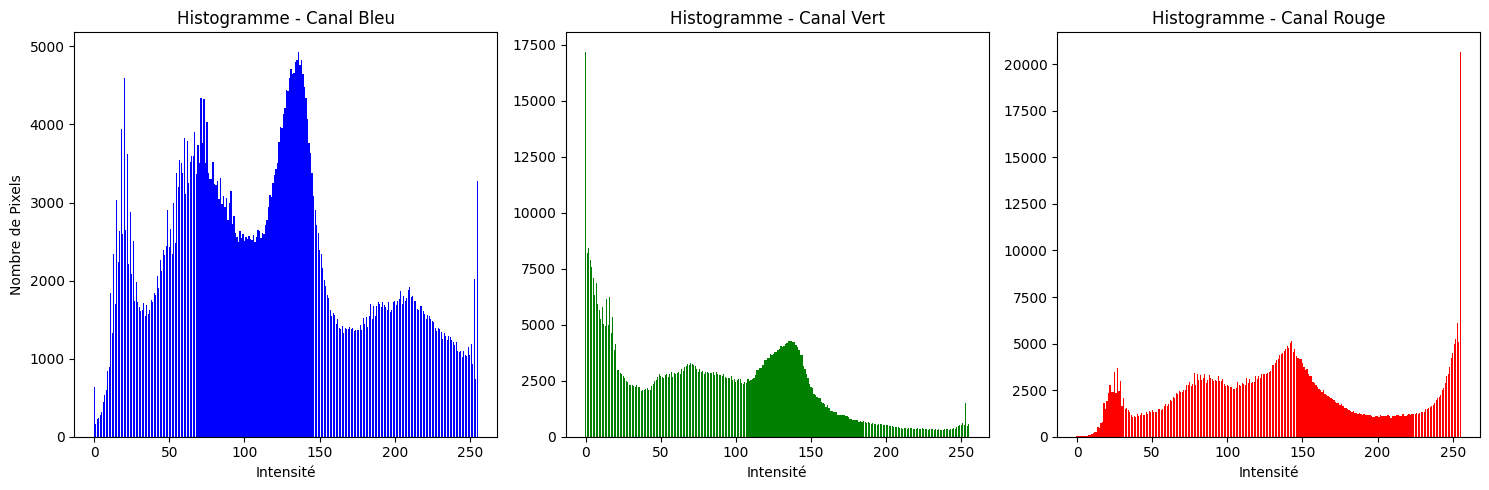

In [81]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), hist_blue, color='blue')
plt.title('Histogramme - Canal Bleu')
plt.xlabel('Intensité')
plt.ylabel('Nombre de Pixels')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_green, color='green')
plt.title('Histogramme - Canal Vert')
plt.xlabel('Intensité')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_red, color='red')
plt.title('Histogramme - Canal Rouge')
plt.xlabel('Intensité')

plt.tight_layout()
plt.show()

# **3RD PART**

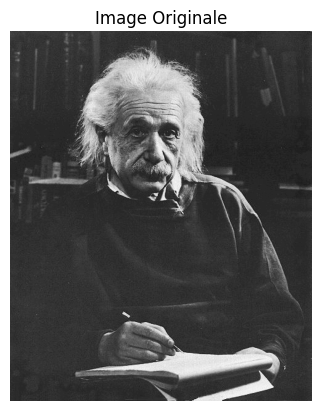

In [82]:
image = cv2.imread('/content/Fig3.tif', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Erreur : Impossible de charger l'image.")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Image Originale")
    plt.axis('off')
    plt.show()

Luminosité de l'image : 102.36


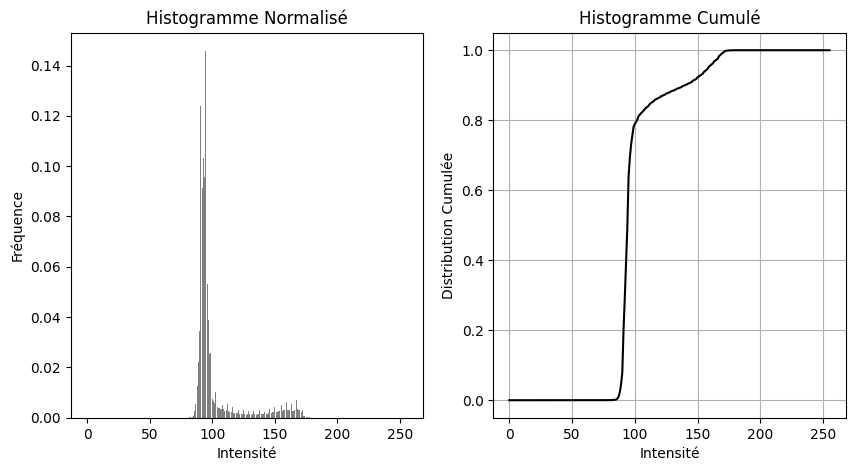

In [83]:
luminosity = np.mean(image)

hist = np.zeros(256, dtype=int)
for pixel in image.flatten():
    hist[pixel] += 1
normalized_hist = hist / hist.sum()

cumulative_hist = np.cumsum(normalized_hist)

print(f"Luminosité de l'image : {luminosity:.2f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(256), normalized_hist, color='gray')
plt.title("Histogramme Normalisé")
plt.xlabel("Intensité")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
plt.plot(cumulative_hist, color='black')
plt.title("Histogramme Cumulé")
plt.xlabel("Intensité")
plt.ylabel("Distribution Cumulée")
plt.grid()
plt.show()

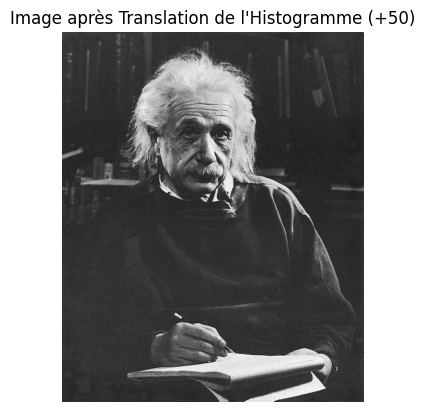

In [84]:
translated_image = np.clip(image + 50, 0, 255).astype(np.uint8)

plt.imshow(translated_image, cmap='gray')
plt.title("Image après Translation de l'Histogramme (+50)")
plt.axis('off')
plt.show()

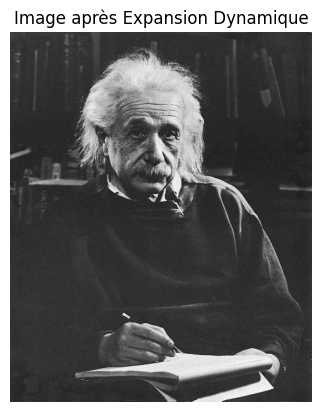

In [85]:
min_val, max_val = np.min(image), np.max(image)
dynamic_expansion_image = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)

plt.imshow(dynamic_expansion_image, cmap='gray')
plt.title("Image après Expansion Dynamique")
plt.axis('off')
plt.show()

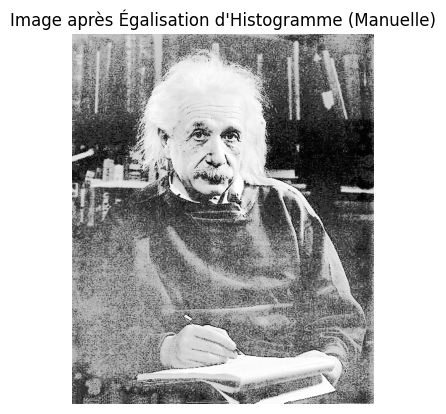

In [86]:
equalized_image_manual = np.interp(image.flatten(), range(256), cumulative_hist * 255).reshape(image.shape).astype(np.uint8)

plt.imshow(equalized_image_manual, cmap='gray')
plt.title("Image après Égalisation d'Histogramme (Manuelle)")
plt.axis('off')
plt.show()

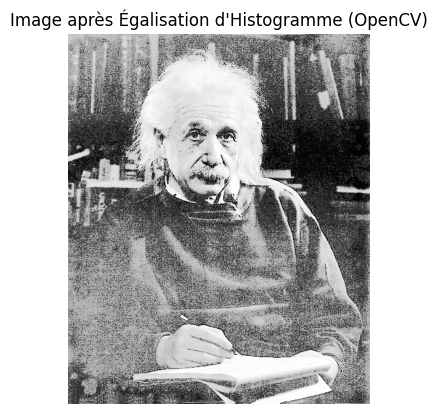

In [87]:
equalized_image_opencv = cv2.equalizeHist(image)

plt.imshow(equalized_image_opencv, cmap='gray')
plt.title("Image après Égalisation d'Histogramme (OpenCV)")
plt.axis('off')
plt.show()

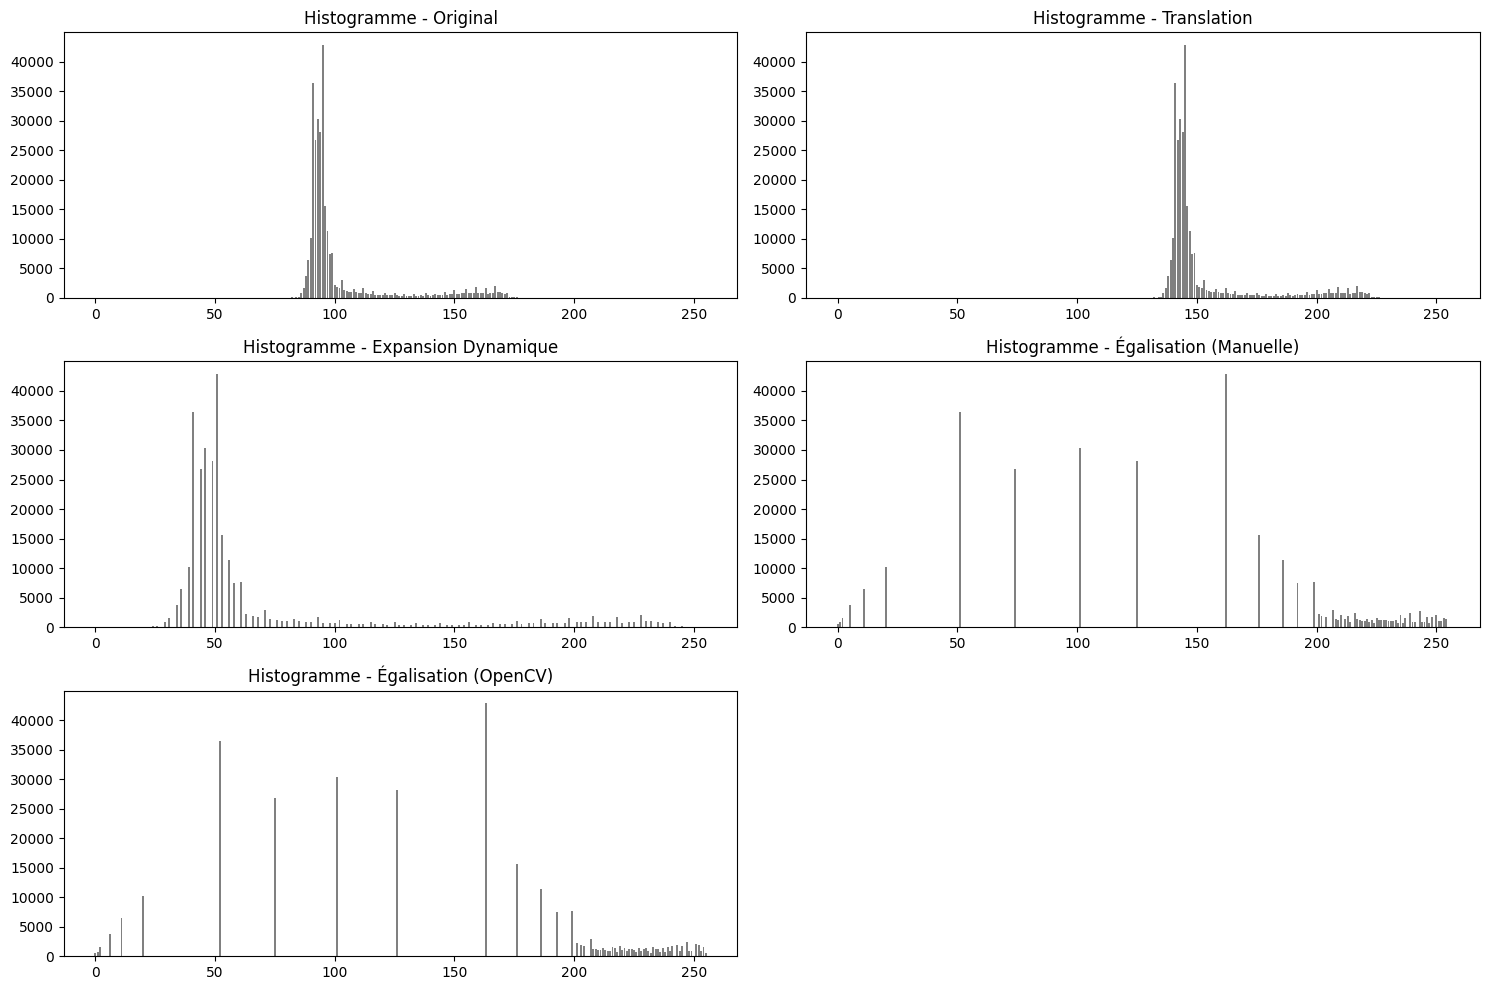

In [88]:
methods = {
    "Original": image,
    "Translation": translated_image,
    "Expansion Dynamique": dynamic_expansion_image,
    "Égalisation (Manuelle)": equalized_image_manual,
    "Égalisation (OpenCV)": equalized_image_opencv,
}

plt.figure(figsize=(15, 10))

for i, (method, img) in enumerate(methods.items(), start=1):
    hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))
    plt.subplot(3, 2, i)
    plt.bar(range(256), hist, color='gray')
    plt.title(f"Histogramme - {method}")

plt.tight_layout()
plt.show()